In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import statsmodels.api as sm
import statsmodels.graphics.api as smg
import seaborn as sns
from scipy.stats import shapiro, kstest, norm, probplot
import pandas as pd
from scipy.stats import t, chi2
from matplotlib.patches import Patch


np.random.seed(0)

In [30]:
df = pd.read_csv("./datasets/wdbc.data", header=None).drop(columns=[0])
df_benign = df[df[1] == 'B'].drop(columns=[1])

<center> 5-elementowa Próbka danych. Kolumna 1 jest klasą, reszta kolumn jest numeryczna i oznacza odpowiednie cechy. </center> 

In [31]:
display(df.sample(5))
print(f"wymiar danych: {df.shape}")

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
512,M,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,...,16.41,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090
457,B,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,...,14.35,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788
439,B,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,...,14.91,19.31,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710
298,B,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,...,16.22,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676
37,B,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169


wymiar danych: (569, 31)


<center> Datasety dla klasy B. Usunięto kolumnę 1 </center> 

In [32]:
display(df_benign.head(5))
print(f"wymiar danych: {df_benign.shape}")

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


wymiar danych: (357, 30)


<center> 
Autorzy w opisie danych umieszczają notkę, że dane składają się z 10 cech:
	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

z czego 30 cech wzięło się z 3 osobnych wartości dla każdego z pomiarów: `mean`, `standard error` i `largest value`. 
Do celów analizy wystarczy nam wzięcie jedynie wartości `mean`, zatem zostaje nam 10 cech.
</center> 

In [33]:
col_names = [
    "radius",
    "texture",
    "perimeter",
    "area",
    "smoothness",
    "compactness",
    "concavity",
    "concave",
    "symmetry",
    "fractal"
]
columns = list(range(2, 12))
columns_dict = dict(zip(columns, col_names))

df_benign = df_benign[columns].rename(columns=columns_dict)

In [34]:
df_benign

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave,symmetry,fractal
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503
...,...,...,...,...,...,...,...,...,...,...
558,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,0.06147
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,0.06570
560,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,0.06171
561,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,0.05502


<center>
<h4>
2. Estymacja parametrów rozkładu (punktowa) (średnia, odchylenie standardowe,
odchylenie przeciętne, mediana, moda, wariancja, kurtoza, skośność, IQR, kwantyle,
itp)
</h4>
</center>

In [35]:
def pointwise_statistics(df):
    stats = df.describe().drop(index='count')
    stats.loc['median'] = df.median(axis=0)
    stats.loc['mode'] = df.mode(axis=0).iloc[0]
    stats.loc['variance'] = df.var(axis=0)
    stats.loc['mean_deviation'] = (abs(df - df.mean())).mean()
    stats.loc['kurtosis'] = df.kurtosis(axis=0)
    stats.loc['skewness'] = df.skew(axis=0)
    stats.loc['IQR'] = stats.loc['75%'] - stats.loc['25%']

    return stats

benign_stats = pointwise_statistics(df_benign)
benign_stats

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave,symmetry,fractal
mean,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867
std,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,0.006747
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.051850
25%,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,0.058530
50%,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,0.061540
75%,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,0.065760
max,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,0.095750
median,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,0.061540
mode,10.260000,14.930000,82.610000,512.200000,0.085110,0.114700,0.000000,0.000000,0.160100,0.059070
variance,3.170222,15.961021,139.415582,18033.030100,0.000181,0.001139,0.001887,0.000253,0.000615,0.000046


Obserwacje:
- Po tabeli statystyk widac od razu, że dane mają bardzo rozbieżne skale, cecha `area` i cecha `fractal` różnią się o 5 rzędów wielkosci.
- kurtoza tylko dla `radius` i `perimeter` osiąga wartości bliskie zeru, co świadczyłoby o podobieństwie w rozkładach tych zmiennych do
  rozkładu normalnego (**mezokurtyczność**). Dla wszystkich innych cech kurtoza jest >0 (**leptokurtyczność**), zazwyczaj w granicach 1-2. Największą kurtozę 
  posiada cecha `concavity`. Może być to zatem cecha, w której intensywność wartości skrajnych jest dużo wyższa niż dla rozkładu normalnego (grube ogony)
- skośność osiąga wartości raczej pozytywne, lub zerowe. Kolumny `radius`, `perimeter` i `area` mogą mieć rozkład zbliżony do symetrycznego, 
  ponieważ ich wartości __skewness__ są bliskie zeru. Reszta kolumn notuje dużo wyższe wyniki co świadczyłoby o **prawostronnej skośności**,
  czyli rozkład będzie posiadał grubszy ogon po prawej stronie od średniej (czyli bardziej strome nachylenie wykresu po lewej).
  Najbardziej prawostronnie skośnymi rozkładami będą `concavity` oraz `fractal` i `compactness`
- Wartość `area` osiąga najwyższe wartości spośród wszystkich cech, a wartość `concave` najmniejsze (biorąc pod uwage rozkłady, nie wartości min i max)
- `concavity` ma spore rozbieżności w wartości **max**. `compactness` ma nieco mniejszą największą wartość, ok 3x większą od średniej. Wszystkie
  inne cechy różnią się około dwukrotnie między średnią a min/max wartościami. Stąd też widzimy, że `concavity` i `compactness` mają outliery, którym
  należałoby się przyjrzeć przy klasyfikacjach.
- Miary takie jak Odchylenia standardowego, średniej, IQR, odchylenia przeciętnego (mean_deviation) ciężko jest analizować między różnymi
  cechami dla nieznormalizowanych danych. W tym celu poniżej zostało wykonane znormalizowanie z użyciem `min-max scalingu`, tj. zakresy
  każdej to teraz [0, 1]
   

In [36]:
df_benign_minmax = (df_benign - df_benign.min(axis=0)) / (df_benign.max(axis=0) - df_benign.min(axis=0))

pointwise_statistics(df_benign_minmax)

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave,symmetry,fractal
mean,0.475253,0.340447,0.484189,0.376255,0.359733,0.296815,0.112117,0.301352,0.405146,0.250966
std,0.163816,0.165773,0.166748,0.158245,0.121387,0.165020,0.105750,0.186416,0.147396,0.153698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.377128,0.225726,0.382432,0.276573,0.274713,0.177195,0.049440,0.176002,0.308972,0.152164
50%,0.480173,0.318672,0.485666,0.371082,0.344227,0.273372,0.090287,0.274666,0.388592,0.220729
75%,0.587819,0.417012,0.597514,0.480321,0.433962,0.382212,0.146032,0.380947,0.493167,0.316856
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
median,0.480173,0.318672,0.485666,0.371082,0.344227,0.273372,0.090287,0.274666,0.388592,0.220729
mode,0.301684,0.216598,0.548228,0.434480,0.293220,0.466067,0.000000,0.000000,0.321450,0.164465
variance,0.026836,0.027481,0.027805,0.025042,0.014735,0.027232,0.011183,0.034751,0.021726,0.023623


Jak widać, kurtoza i skewness nie zmieniły swoich wartości, ponieważ nie zależą od skali. Inne wartości są już lepiej porównywalne
dlatego tutaj będą kontynuowane obserwacje:
- zgodnie z założeniami wartości min i max to teraz odpowiednio 0 i 1, zatem dane są poprawnie znormalizowane
- Odchylenie standardowe oraz IQR (na przykład) mówią nam o zagęszczeniu danych wokół konkretnego punktu centralnego. W przypadku 
  std będzie to średnia. `concavity` ma najmniejsze te wartości, zatem ta masa rozkładu jest dla niej najbardziej skoncentrowana.
  Odwrotna sytuacja występuje dla cechy np. `concave`, `radius`, `perimeter` itp., gdzie wartości IQR to ok 0.2, a std jest w 
  granicach [0.16, 0.18]. Spodziewamy się, że dane będą mniej skoncentrowane wokół średniej, a bardziej rozłożone.
- Odchylenie przeciętne (mean_deviation) jest zależne od odchylenia standardowego, dostarcza podobnych informacji co powyżej.
  W tym przypadku po `concave` widać nawet większą koncentrację.
- Cechy `radius`, `perimeter`, `symmetry` są umiejscowione mniej więcej po środku przedziału, tzn nie będzie w nich widać
  dużej skośności, średnia mniej więcej odpowiada dla nich modzie (50%). Dla innych cech widzimy raczej przesunięcie środka masy
  na lewą stronę przedziału 

<center>
<h4>
3. Estymacja parametrów (przedziałowa) (przedział ufności dla wariancji i dla średniej)
oraz metoda nieparametryczna (bootstrap) dla średniej i porównanie
</h4>
</center>

<center>
<h3>
Metoda Parametryczna
</h3>
</center

In [37]:
def confidence_intervals(df, alpha=0.05):
    n = len(df)
    means = df.mean()
    stds = df.std()
    variances = df.var()
    
    mean_cis = {}
    for col in df.columns:
        mean = means[col]
        std = stds[col]
        t_crit = t.ppf(1 - alpha/2, n-1)
        margin_of_error = t_crit * (std / np.sqrt(n))
        mean_cis[col] = (mean - margin_of_error, mean + margin_of_error)
    
    var_cis = {}
    for col in df.columns:
        var = variances[col]
        chi2_lower = chi2.ppf(alpha/2, n-1)
        chi2_upper = chi2.ppf(1 - alpha/2, n-1)
        lower_bound = (n - 1) * var / chi2_upper
        upper_bound = (n - 1) * var / chi2_lower
        var_cis[col] = (lower_bound, upper_bound)
    
    return mean_cis, var_cis

mean_cis, var_cis = confidence_intervals(df_benign)

mean_cis_df = pd.DataFrame(mean_cis, index=["Lower Bound (Mean)", "Upper Bound (Mean)"]).T

var_cis_df = pd.DataFrame(var_cis, index=["Lower Bound (Variance)", "Upper Bound (Variance)"]).T

confidence_intervals_df = pd.concat([mean_cis_df, var_cis_df], axis=1)

print("Przedziały ufności dla średnich")
display(mean_cis_df)
print("Przedziały ufności dla wariancji")
display(var_cis_df)


Przedziały ufności dla średnich


,Lower Bound (Mean),Upper Bound (Mean)
radius,11.961197,12.331850
texture,17.498925,18.330599
perimeter,76.846415,79.304397
area,448.812766,476.767626
smoothness,0.091078,0.093877
compactness,0.076572,0.083598
concavity,0.041536,0.050579
concave,0.024062,0.027373
symmetry,0.171604,0.176768
fractal,0.062165,0.063570


Przedziały ufności dla wariancji


,Lower Bound (Variance),Upper Bound (Variance)
radius,2.751565,3.692806
texture,13.853223,18.592062
perimeter,121.004493,162.397084
area,15651.605285,21005.625487
smoothness,0.000157,0.000211
compactness,0.000989,0.001327
concavity,0.001638,0.002198
concave,0.000220,0.000295
symmetry,0.000534,0.000717
fractal,0.000040,0.000053


<center>
<h3>
Metoda Bootstrap
</h3>
</center

In [38]:
def bootstrap_ci(data, num_samples=1000, alpha=0.05):
    boot_means = []
    boot_vars = []
    n = len(data)
    
    for _ in range(num_samples):
        sample = np.random.choice(data, size=n, replace=True)
        boot_means.append(np.mean(sample))
        boot_vars.append(np.var(sample, ddof=1))
    
    mean_ci = np.percentile(boot_means, [100*alpha/2, 100*(1-alpha/2)])
    var_ci = np.percentile(boot_vars, [100*alpha/2, 100*(1-alpha/2)])
    
    return mean_ci, var_ci

mean_ci_results = {}
var_ci_results = {}

for column in df_benign.columns:
    data = df_benign[column].values
    mean_ci, var_ci = bootstrap_ci(data)
    mean_ci_results[column] = {
        'Mean CI Lower': mean_ci[0],
        'Mean CI Upper': mean_ci[1]
    }
    var_ci_results[column] = {
        'Variance CI Lower': var_ci[0],
        'Variance CI Upper': var_ci[1]
    }

mean_ci_df_boot = pd.DataFrame(mean_ci_results).T
var_ci_df_boot = pd.DataFrame(var_ci_results).T

print("Przedziały ufności dla średnich cech (bootstrap):")
display(mean_ci_df_boot)

print("Przedziały ufności dla wariancji cech (bootstrap):")
display(var_ci_df_boot)


Przedziały ufności dla średnich cech (bootstrap):


,Mean CI Lower,Mean CI Upper
radius,11.958990,12.328887
texture,17.498072,18.349173
perimeter,76.880464,79.334487
area,449.470287,476.534671
smoothness,0.091221,0.093953
compactness,0.076644,0.083312
concavity,0.041370,0.050430
concave,0.024156,0.027546
symmetry,0.171547,0.176757
fractal,0.062209,0.063581


Przedziały ufności dla wariancji cech (bootstrap):


,Variance CI Lower,Variance CI Upper
radius,2.715014,3.626649
texture,13.062217,19.018141
perimeter,120.781252,160.483438
area,15446.358608,21021.665866
smoothness,0.000148,0.000219
compactness,0.000916,0.001360
concavity,0.001081,0.002928
concave,0.000209,0.000302
symmetry,0.000501,0.000730
fractal,0.000036,0.000058


<center>
<h3>
Porównanie obu metod
</h3>
</center

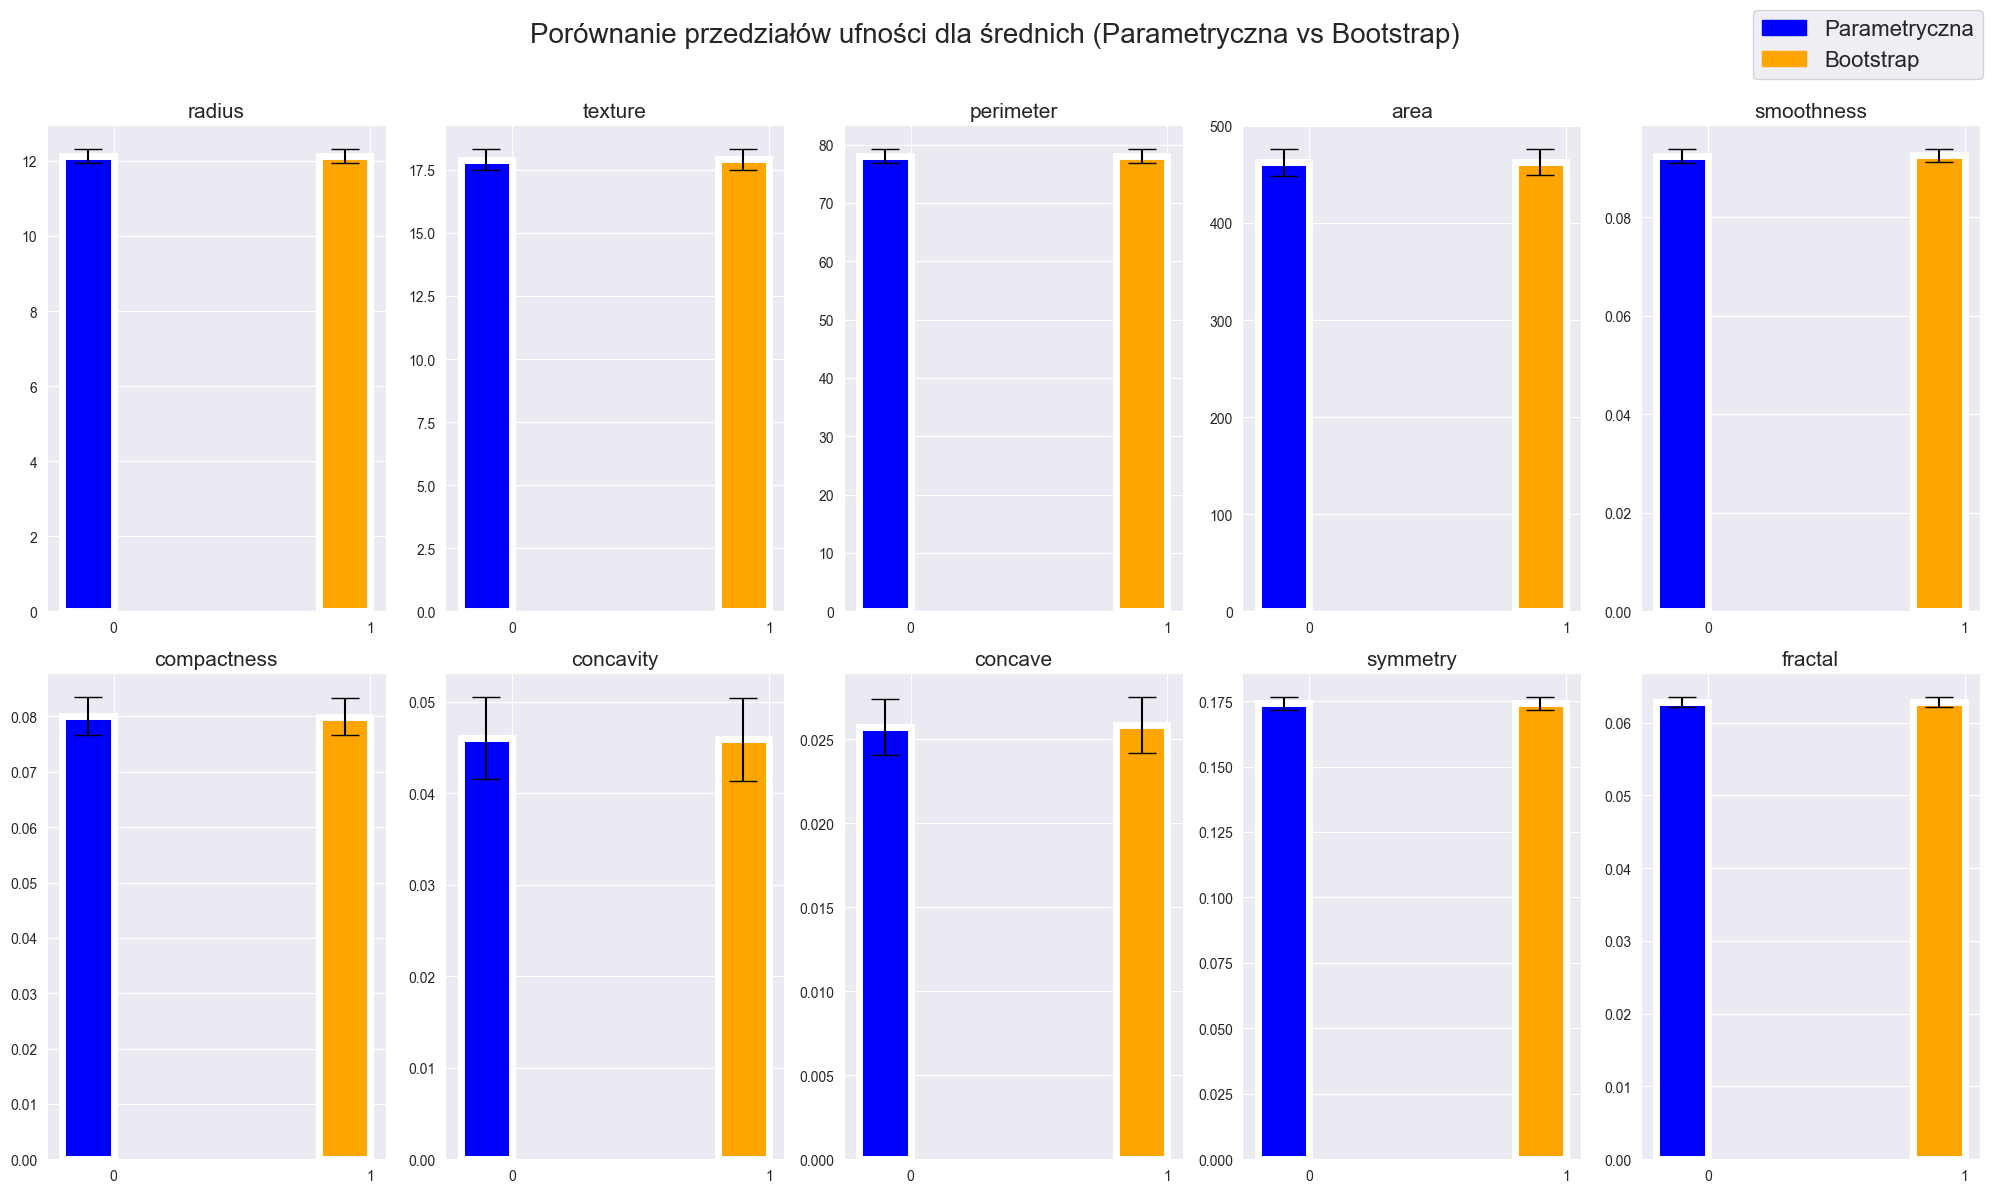

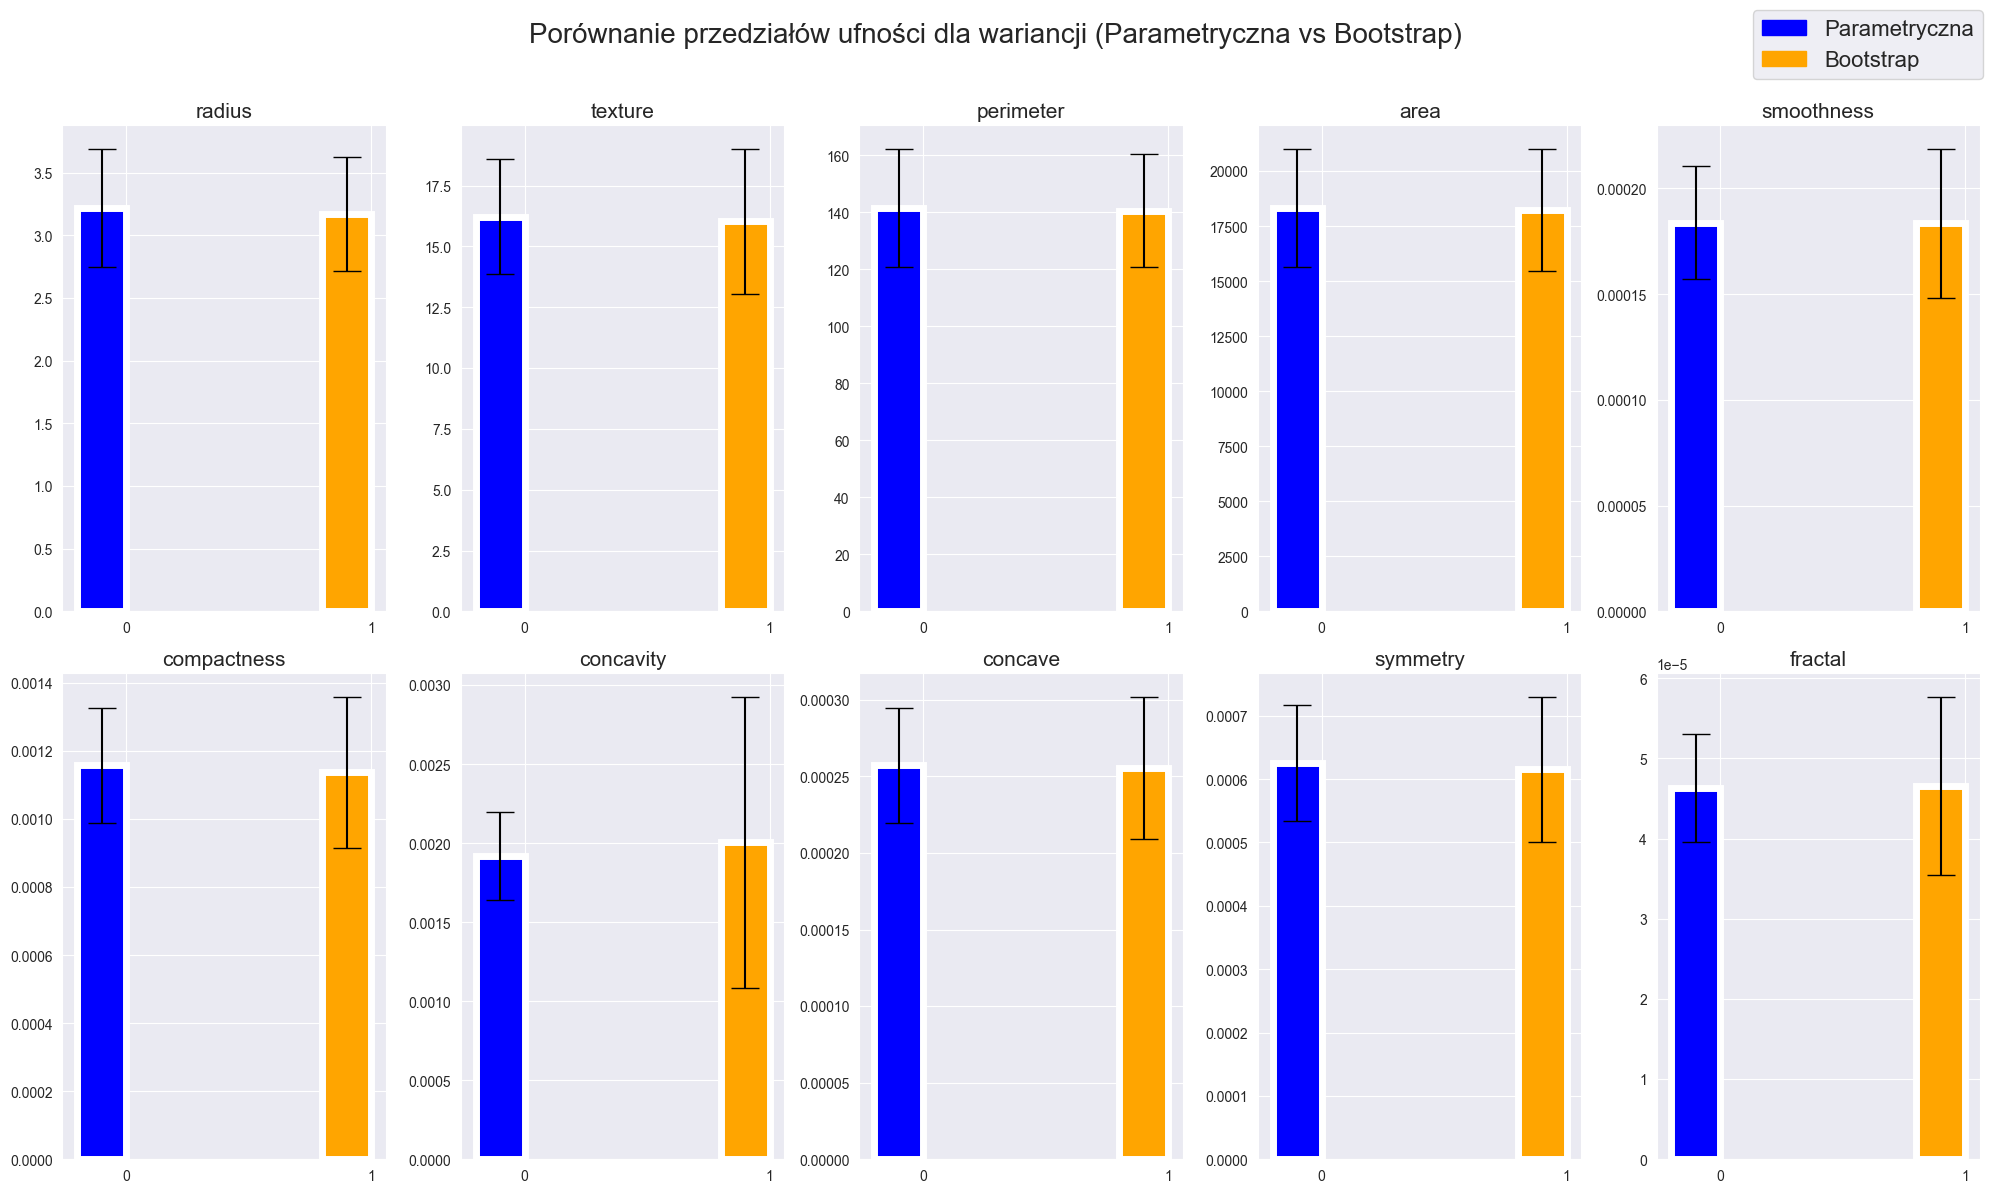

In [39]:


def plot_individual_ci_comparison(mean_cis_df, var_cis_df, mean_ci_df_boot, var_ci_df_boot):
    num_features = len(mean_cis_df)
    num_cols = 5
    num_rows = int(np.ceil(num_features / num_cols)) 
    
    fig_mean, axes_mean = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 6))
    fig_mean.suptitle('Porównanie przedziałów ufności dla średnich (Parametryczna vs Bootstrap)', fontsize=20)
    
    legend_patches = [Patch(color='blue', label='Parametryczna'), Patch(color='orange', label='Bootstrap')]
    
    for i, feature in enumerate(mean_cis_df.index):
        row = i // num_cols
        col = i % num_cols
        ax = axes_mean[row, col] if num_rows > 1 else axes_mean[col]
        
        param_mean = mean_cis_df.loc[feature]
        boot_mean = mean_ci_df_boot.loc[feature]
        
        param_error = (param_mean["Upper Bound (Mean)"] - param_mean["Lower Bound (Mean)"]) / 2
        boot_error = (boot_mean["Mean CI Upper"] - boot_mean["Mean CI Lower"]) / 2
        
        x = np.arange(2)
        means = [param_mean["Lower Bound (Mean)"] + param_error, boot_mean["Mean CI Lower"] + boot_error]
        errors = [param_error, boot_error]
        
        ax.bar(x - 0.1, means, 0.2, yerr=errors, capsize=10, color=['blue', 'orange'], linewidth=5)
        ax.set_xticks(x)
        ax.set_title(f'{feature}', fontsize=15)
    fig_mean.legend(handles=legend_patches, loc='upper right', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    fig_var, axes_var = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 6))
    fig_var.suptitle('Porównanie przedziałów ufności dla wariancji (Parametryczna vs Bootstrap)', fontsize=20)
    
    for i, feature in enumerate(var_cis_df.index):
        row = i // num_cols
        col = i % num_cols
        ax = axes_var[row, col] if num_rows > 1 else axes_var[col]

        param_var = var_cis_df.loc[feature]
        boot_var = var_ci_df_boot.loc[feature]

        param_error = (param_var["Upper Bound (Variance)"] - param_var["Lower Bound (Variance)"]) / 2
        boot_error = (boot_var["Variance CI Upper"] - boot_var["Variance CI Lower"]) / 2

        x = np.arange(2)
        vars = [param_var["Lower Bound (Variance)"] + param_error, boot_var["Variance CI Lower"] + boot_error]
        errors = [param_error, boot_error]

        ax.bar(x - 0.1, vars, 0.2, yerr=errors, capsize=10, color=['blue', 'orange'], linewidth=5)
        ax.set_xticks(x)
        ax.set_title(f'{feature}', fontsize=15)
    
    fig_var.legend(handles=legend_patches, loc='upper right', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    plt.show()

plot_individual_ci_comparison(mean_cis_df, var_cis_df, mean_ci_df_boot, var_ci_df_boot)

<center>
<h4>
4. Różne wykresy (im więcej tym lepiej). Powinny być histogramy, wykresy
kwantyl-kwantyl, boxplot i inne.
</h4>
</center>

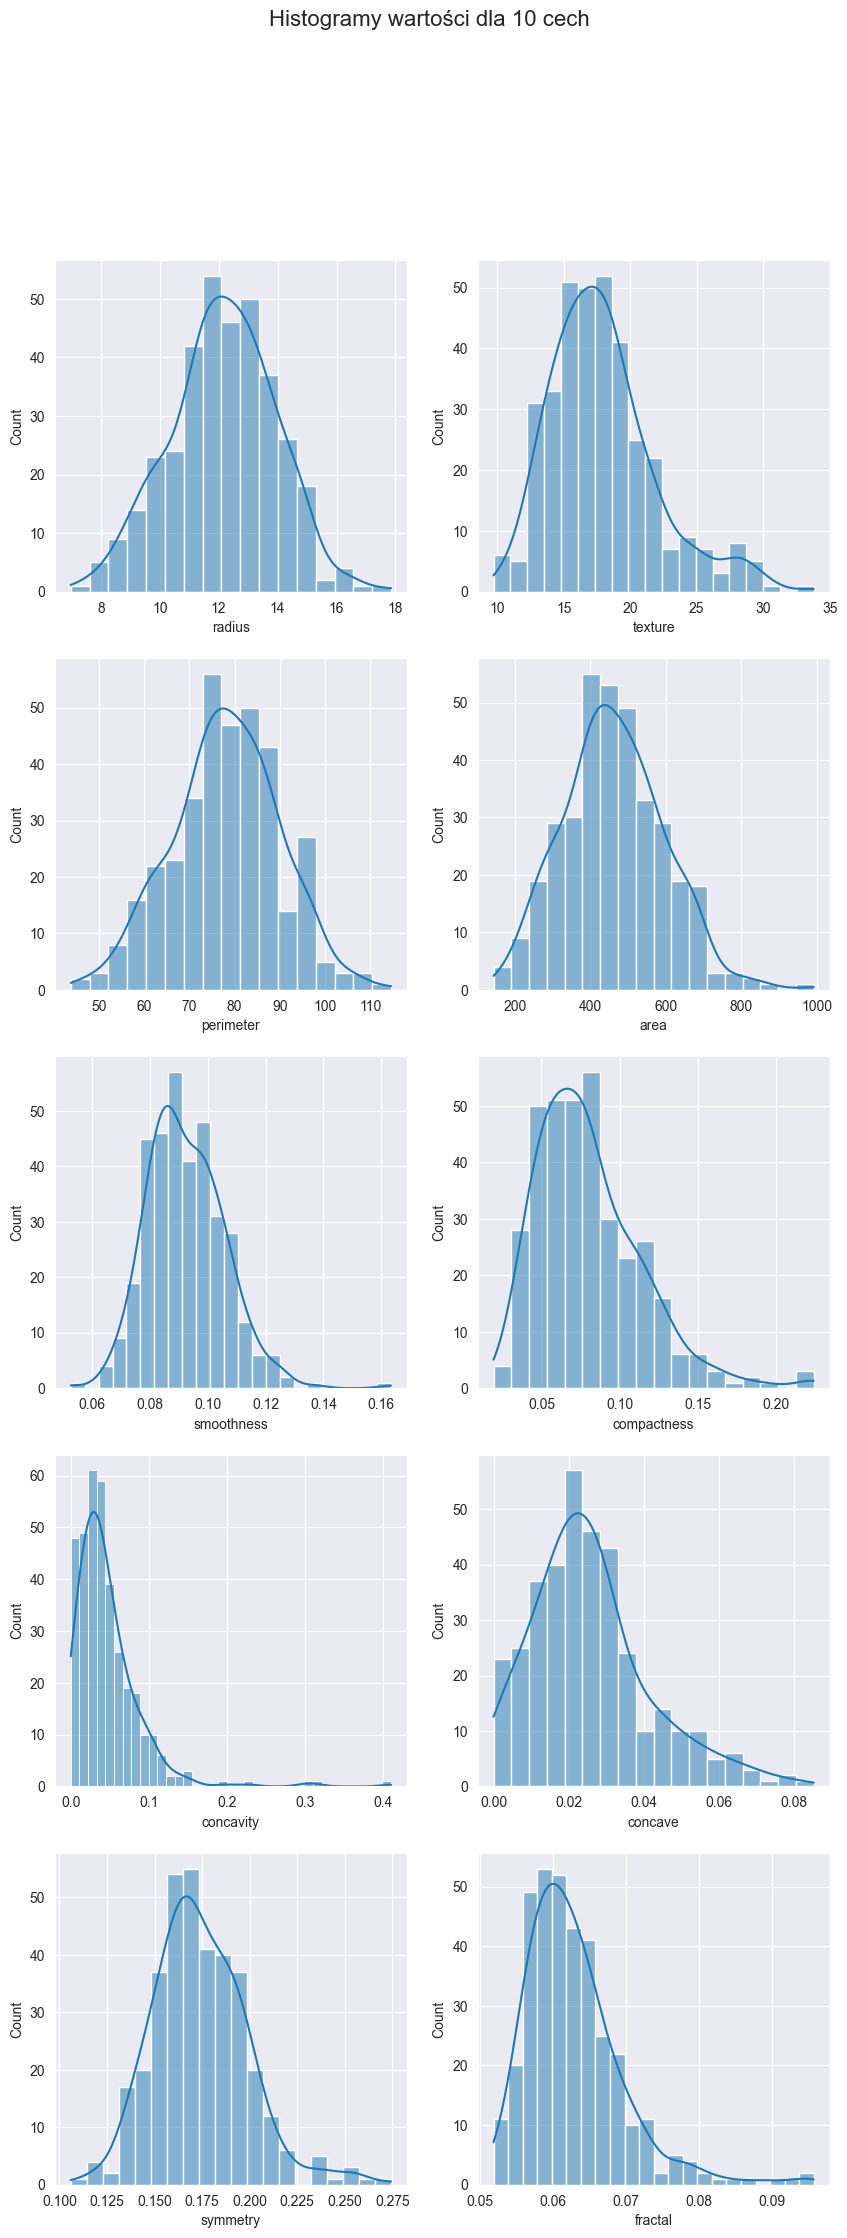

In [40]:
fig, ax = plt.subplots(5, 2, figsize=(10, 25))

for i, col in enumerate(col_names):
    sns.histplot(data=df_benign[col], kde=True, ax=ax[i // 2][i % 2])
    ax[i // 2][i % 2].grid(True)

fig.suptitle('Histogramy wartości dla 10 cech', fontsize=16)
plt.show()

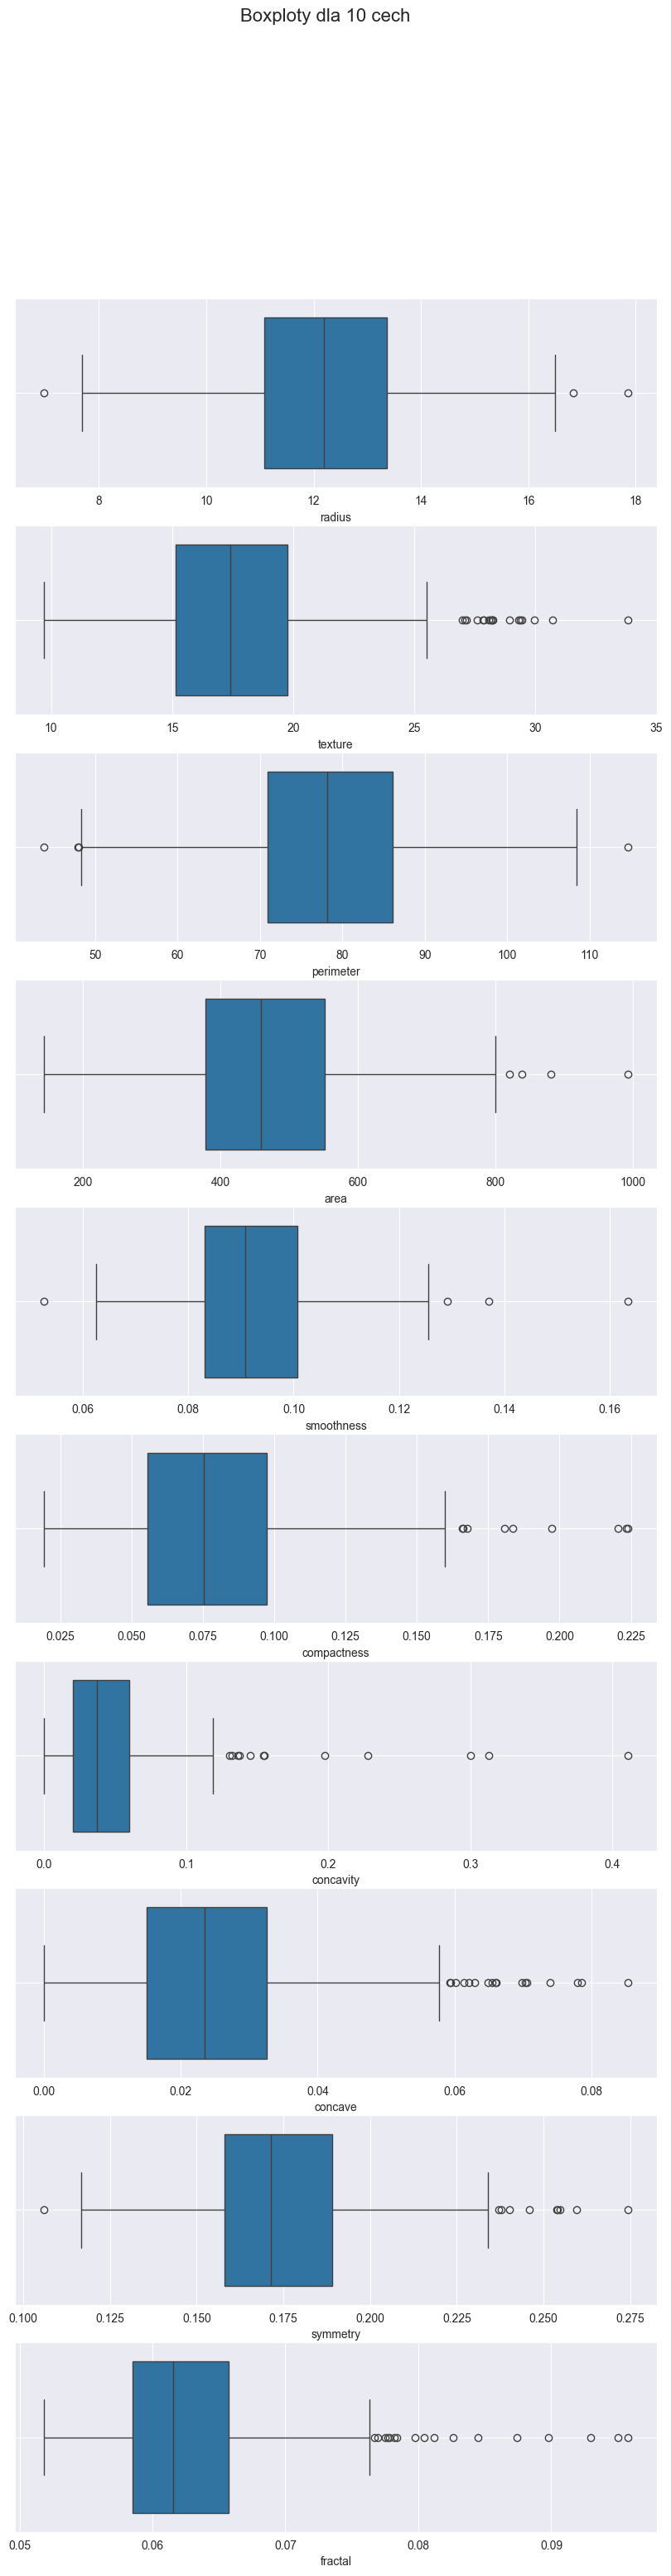

In [41]:
fig, ax = plt.subplots(10, 1, figsize=(10, 35))

for i, col in enumerate(col_names):
    sns.boxplot(x=df_benign[col], ax=ax[i])
    ax[i].grid(True)

fig.suptitle('Boxploty dla 10 cech', fontsize=16)
plt.show()

Obserwacja:
- Widać, że dla cech `radius`, `compactness`, `concavity`, `concave`, `symmetry` zauważamy sporo wartości odstających 
(outlierów).
- Outliery pojawiają się najczęściej dla rozkładów, które są prawostronnie skośne, a same outliery są skoncentrowane
  właśnie po prawej stronie rozkładu.

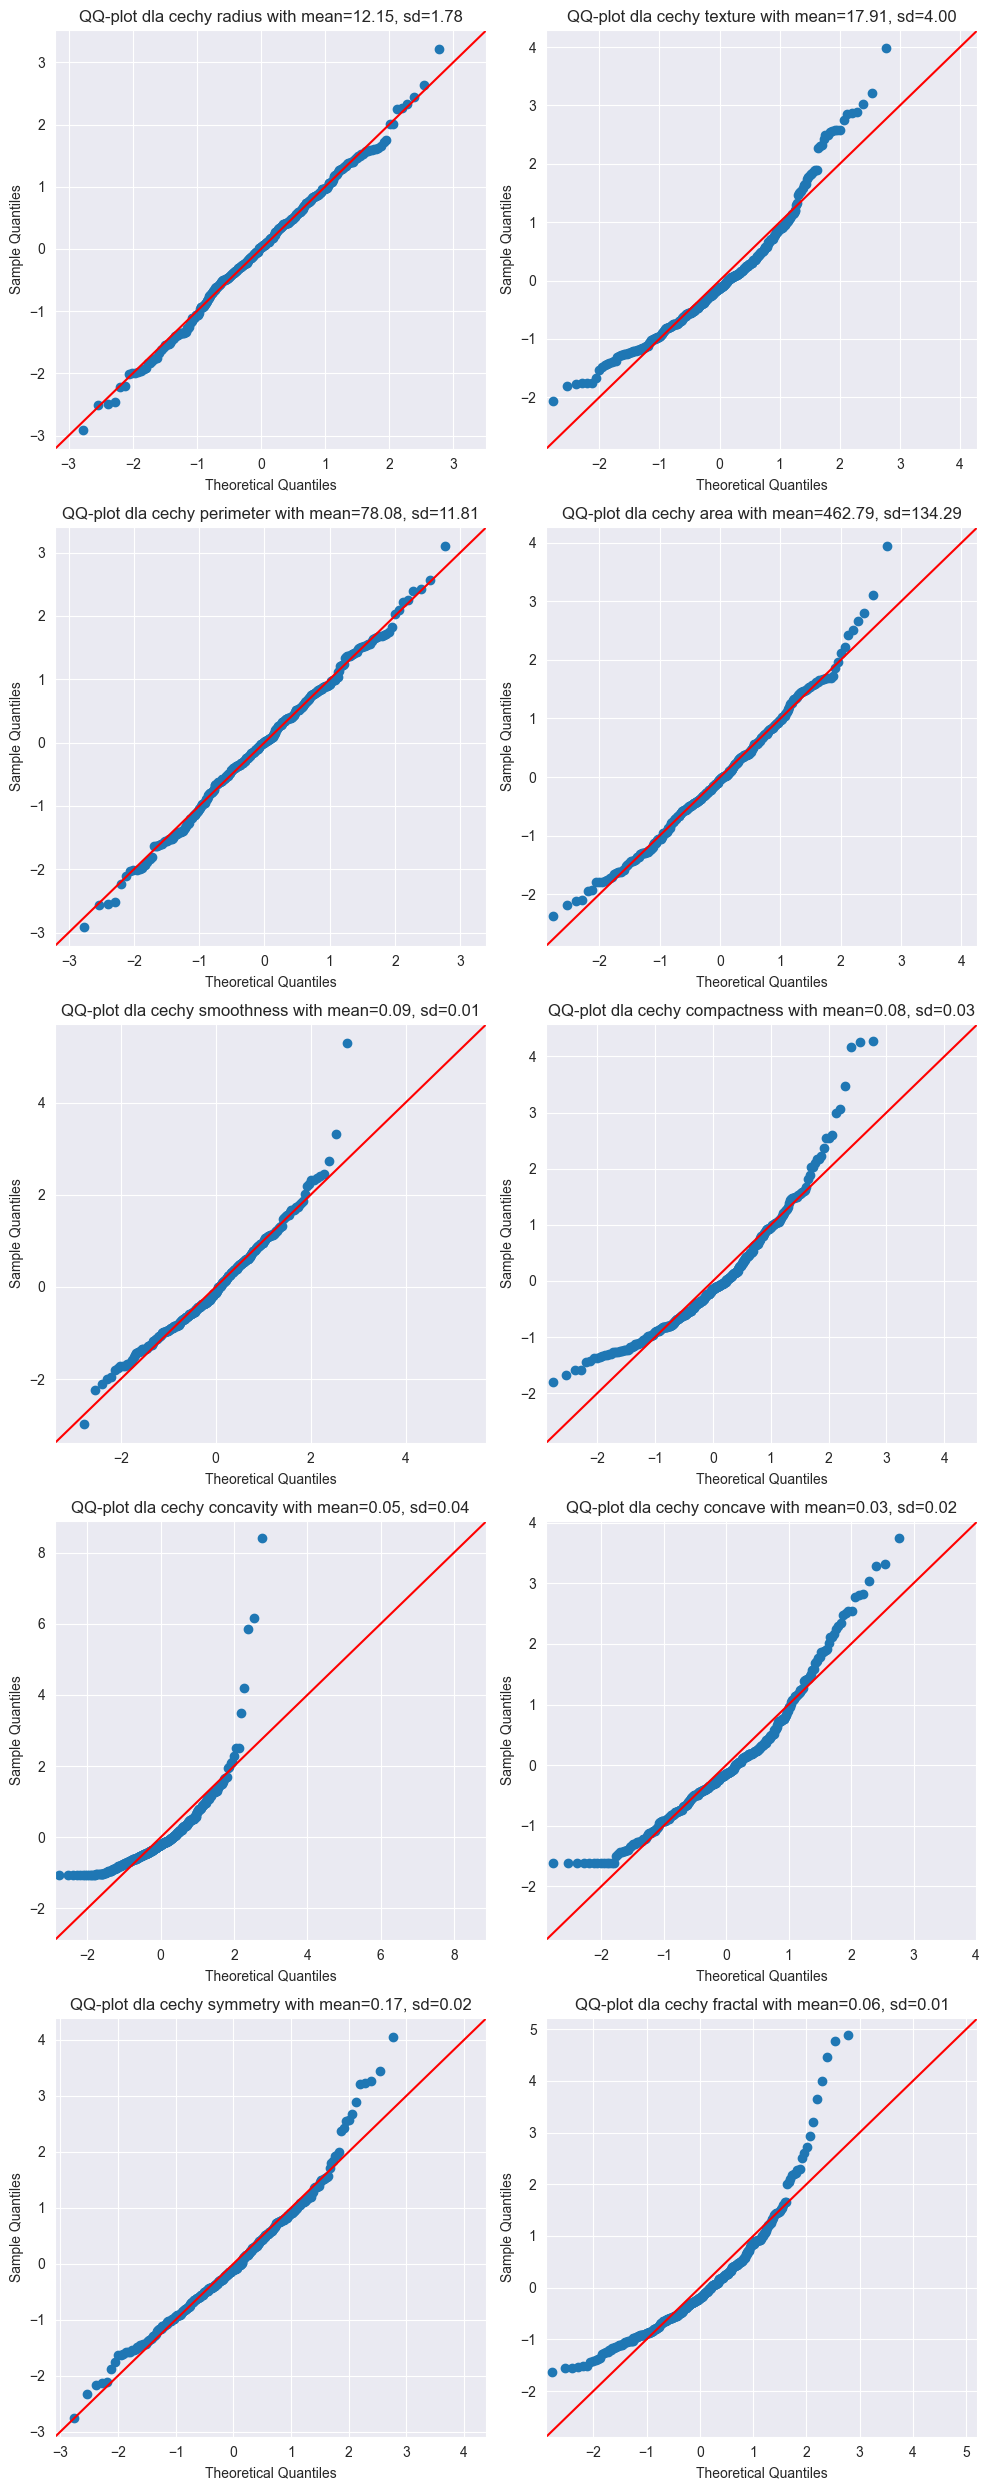

In [42]:
fig, ax = plt.subplots(5, 2, figsize=(10, 25))

for i, col in enumerate(col_names):
    loc = df_benign[col].mean()
    scale = df_benign[col].std()
    sm.qqplot(df_benign[col], fit=True, line ='45', ax=ax[i // 2][i % 2])
    ax[i // 2][i % 2].set_title(f'QQ-plot dla cechy {col} with mean={loc:.2f}, sd={scale:.2f}')
    ax[i // 2][i % 2].grid(True)

plt.tight_layout()
plt.show()

Obserwacje:
-  `radius`, `perimeter`, `area`, `smoothness` praktycznie pokrywają się z linią o nachyleniu 45 stopni. Oznacza 
   to, że z wysokim prawdopodobieństwem można stwiedzić, że te cechy mają rozkład bliski rozkładowi normalnemu,
   jednak ostateczne rozstrzygnięcie będzie zależeć również od wyników testów normalności.
- Dla pozostałych cech, a w szczególności `concavity`, wartości przyjmują kształt łuku. Oznacza to, że
  rozklady nie są już zbliżone do normalnych. Łuk oznacza, że rozkład danych jest skośny. (Dla rozkładu o grubych ogonach 
  przyjąłby raczej kształt podobny do ograniczonej funkcji sinh )
- W danych nie występują wielokrotnie występujące te same wartości, ponieważ na qqplotach nie widać, fragmentów skokowych, w ktorych
  punkty przyjmują tą samą wartość na osi Y

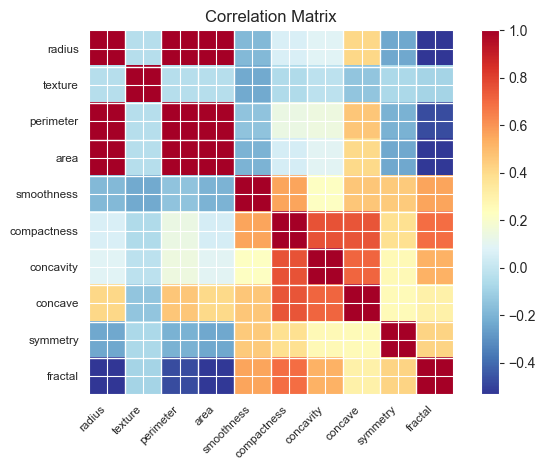

In [43]:
corr_matrix = np.corrcoef(df_benign.values.T)
smg.plot_corr(corr_matrix, xnames=df_benign.columns)
plt.show()

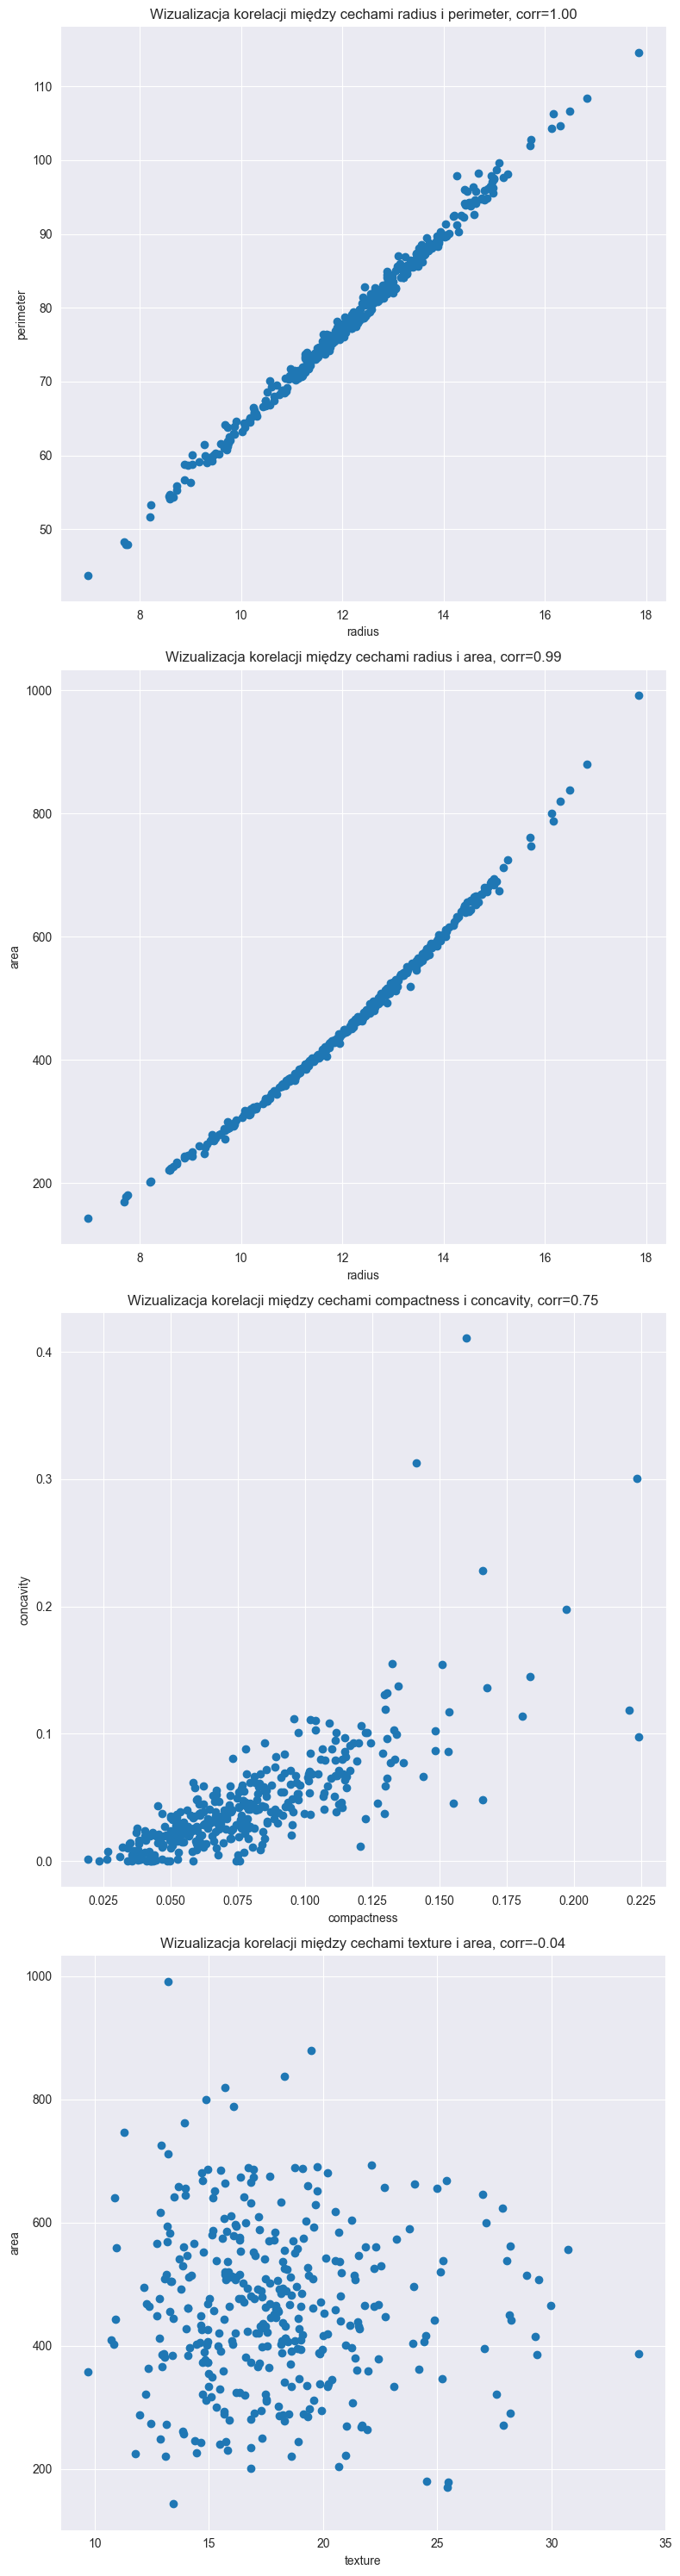

In [44]:
fig, ax = plt.subplots(4, 1, figsize=(8, 30))

cols_corr = [('radius', 'perimeter', (0,2)), ('radius', 'area', (0,3)), ('compactness', 'concavity', (5,6)), ("texture", "area", (1, 3))]

for i, (col1, col2, corr_id) in enumerate(cols_corr):
    ax[i].scatter(df_benign[col1], df_benign[col2])
    ax[i].set_xlabel(col1)
    ax[i].set_ylabel(col2)
    ax[i].set_title(f'Wizualizacja korelacji między cechami {col1} i {col2}, corr={corr_matrix[corr_id]:.2f}')
    ax[i].grid(True)

plt.tight_layout()
plt.show()

Obserwacje:
- Dla cech wysoko skorelowanych widać również na wykresach wysoką zależność jednej cechy od drugiej
- Zależność radius-area jest widocznie zakrzywiona, co poprawnie świadczyłoby o kwadratowej zależności
  między zmiennymi wynikającej z wzoru **(area = PI * r^2)** (siatka nie jest symetryczna, stąd kwadratowy
  związek moze sie wydawać nieduży, ale jest poprawny)
- Słabiej skorelowane cechy mają więcej szumu, ale wciąż są poprawne
- Cechy nieskorelowane nie wykazują żadnych trendów.


<center>
<h4>
5. Sprawdzenie czy rozkład (rozkłady) danych pochodzą z rozkładu normalnego
</h4>
</center>

Normalność rozkładów danych dla łagodnych guzów:


,Feature,Shapiro-Wilk Statistic,p-value,Normal Distribution
0,radius,0.996653,6.679931e-01,True
1,texture,0.944173,2.384948e-10,False
2,perimeter,0.997096,7.794938e-01,True
3,area,0.990641,2.277846e-02,False
4,smoothness,0.975511,9.507030e-06,False
5,compactness,0.925871,2.644178e-12,False
6,concavity,0.737276,2.245620e-23,False
7,concave,0.946724,4.804124e-10,False
8,symmetry,0.974092,5.182290e-06,False
9,fractal,0.887000,1.446333e-15,False


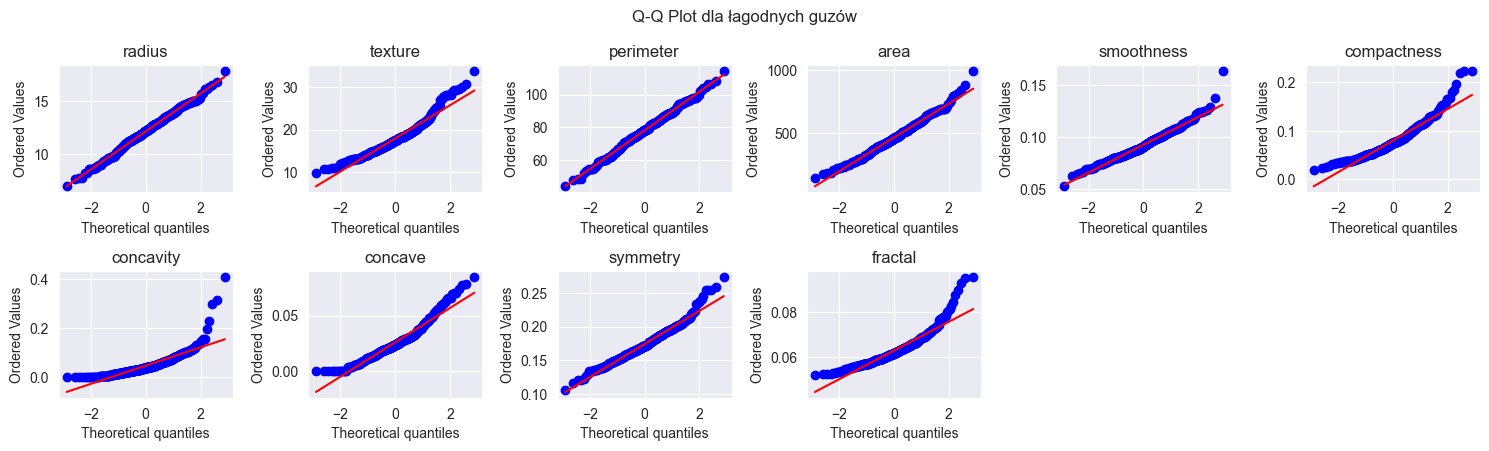

In [48]:
# Function to test normality using Shapiro-Wilk test
def test_normality(data, alpha=0.05):
    results = []
    for column in data.columns:
        stat, p_value = shapiro(data[column])
        results.append((column, stat, p_value, p_value > alpha))
    return pd.DataFrame(results, columns=['Feature', 'Shapiro-Wilk Statistic', 'p-value', 'Normal Distribution'])

# Function to plot Q-Q plot
def qq_plot(data, title):
    plt.figure(figsize=(15, 10))
    for column in data.columns:
        plt.subplot(5, 6, data.columns.get_loc(column) + 1)
        probplot(data[column], dist="norm", plot=plt)
        plt.title(column)
    plt.tight_layout()
    plt.suptitle(title, y=1.02)
    plt.show()

# Testing normality for benign subset
benign_normality = test_normality(df_benign)
print("Normalność rozkładów danych dla łagodnych guzów:")
display(benign_normality)

# Q-Q plot for benign subset
qq_plot(df_benign, "Q-Q Plot dla łagodnych guzów")


Test Shapiro-Wilka sprawdza, czy próbka pochodzi z rozkładu normalnego.Dla każdej zmiennej uzyskaliśmy statystyki Shapiro-Wilka i wartości p.
### Interpretacja wyników:
* Wartość p > 0.05 sugeruje, że nie ma dowodów na odrzucenie hipotezy zerowej, co oznacza, że zmienna może pochodzić z rozkładu normalnego.
* Wartość p ≤ 0.05 sugeruje odrzucenie hipotezy zerowej, co oznacza, że zmienna nie pochodzi z rozkładu normalnego.

### Wnioski
* radius: Wartość p = 0.6679931 > 0.05, co oznacza, że możemy przyjąć, że zmienna "radius" pochodzi z rozkładu normalnego.
* texture: Wartość p = 2.384948e-10 ≤ 0.05, co oznacza, że zmienna "texture" nie pochodzi z rozkładu normalnego.
* perimeter: Wartość p = 0.7794938 > 0.05, co oznacza, że możemy przyjąć, że zmienna "perimeter" pochodzi z rozkładu normalnego.
* area: Wartość p = 0.02277846 ≤ 0.05, co oznacza, że zmienna "area" nie pochodzi z rozkładu normalnego.
* smoothness: Wartość p = 9.507030e-06 ≤ 0.05, co oznacza, że zmienna "smoothness" nie pochodzi z rozkładu normalnego.
* compactness: Wartość p = 2.644178e-12 ≤ 0.05, co oznacza, że zmienna "compactness" nie pochodzi z rozkładu normalnego.
* concavity: Wartość p = 2.245620e-23 ≤ 0.05, co oznacza, że zmienna "concavity" nie pochodzi z rozkładu normalnego.
* concave: Wartość p = 4.804124e-10 ≤ 0.05, co oznacza, że zmienna "concave" nie pochodzi z rozkładu normalnego.
* symmetry: Wartość p = 5.182290e-06 ≤ 0.05, co oznacza, że zmienna "symmetry" nie pochodzi z rozkładu normalnego.
* fractal: Wartość p = 1.446333e-15 ≤ 0.05, co oznacza, że zmienna "fractal" nie pochodzi z rozkładu normalnego.


<center>
<h4>
6. Estymator jądrowy gęstości
</h4>
</center>

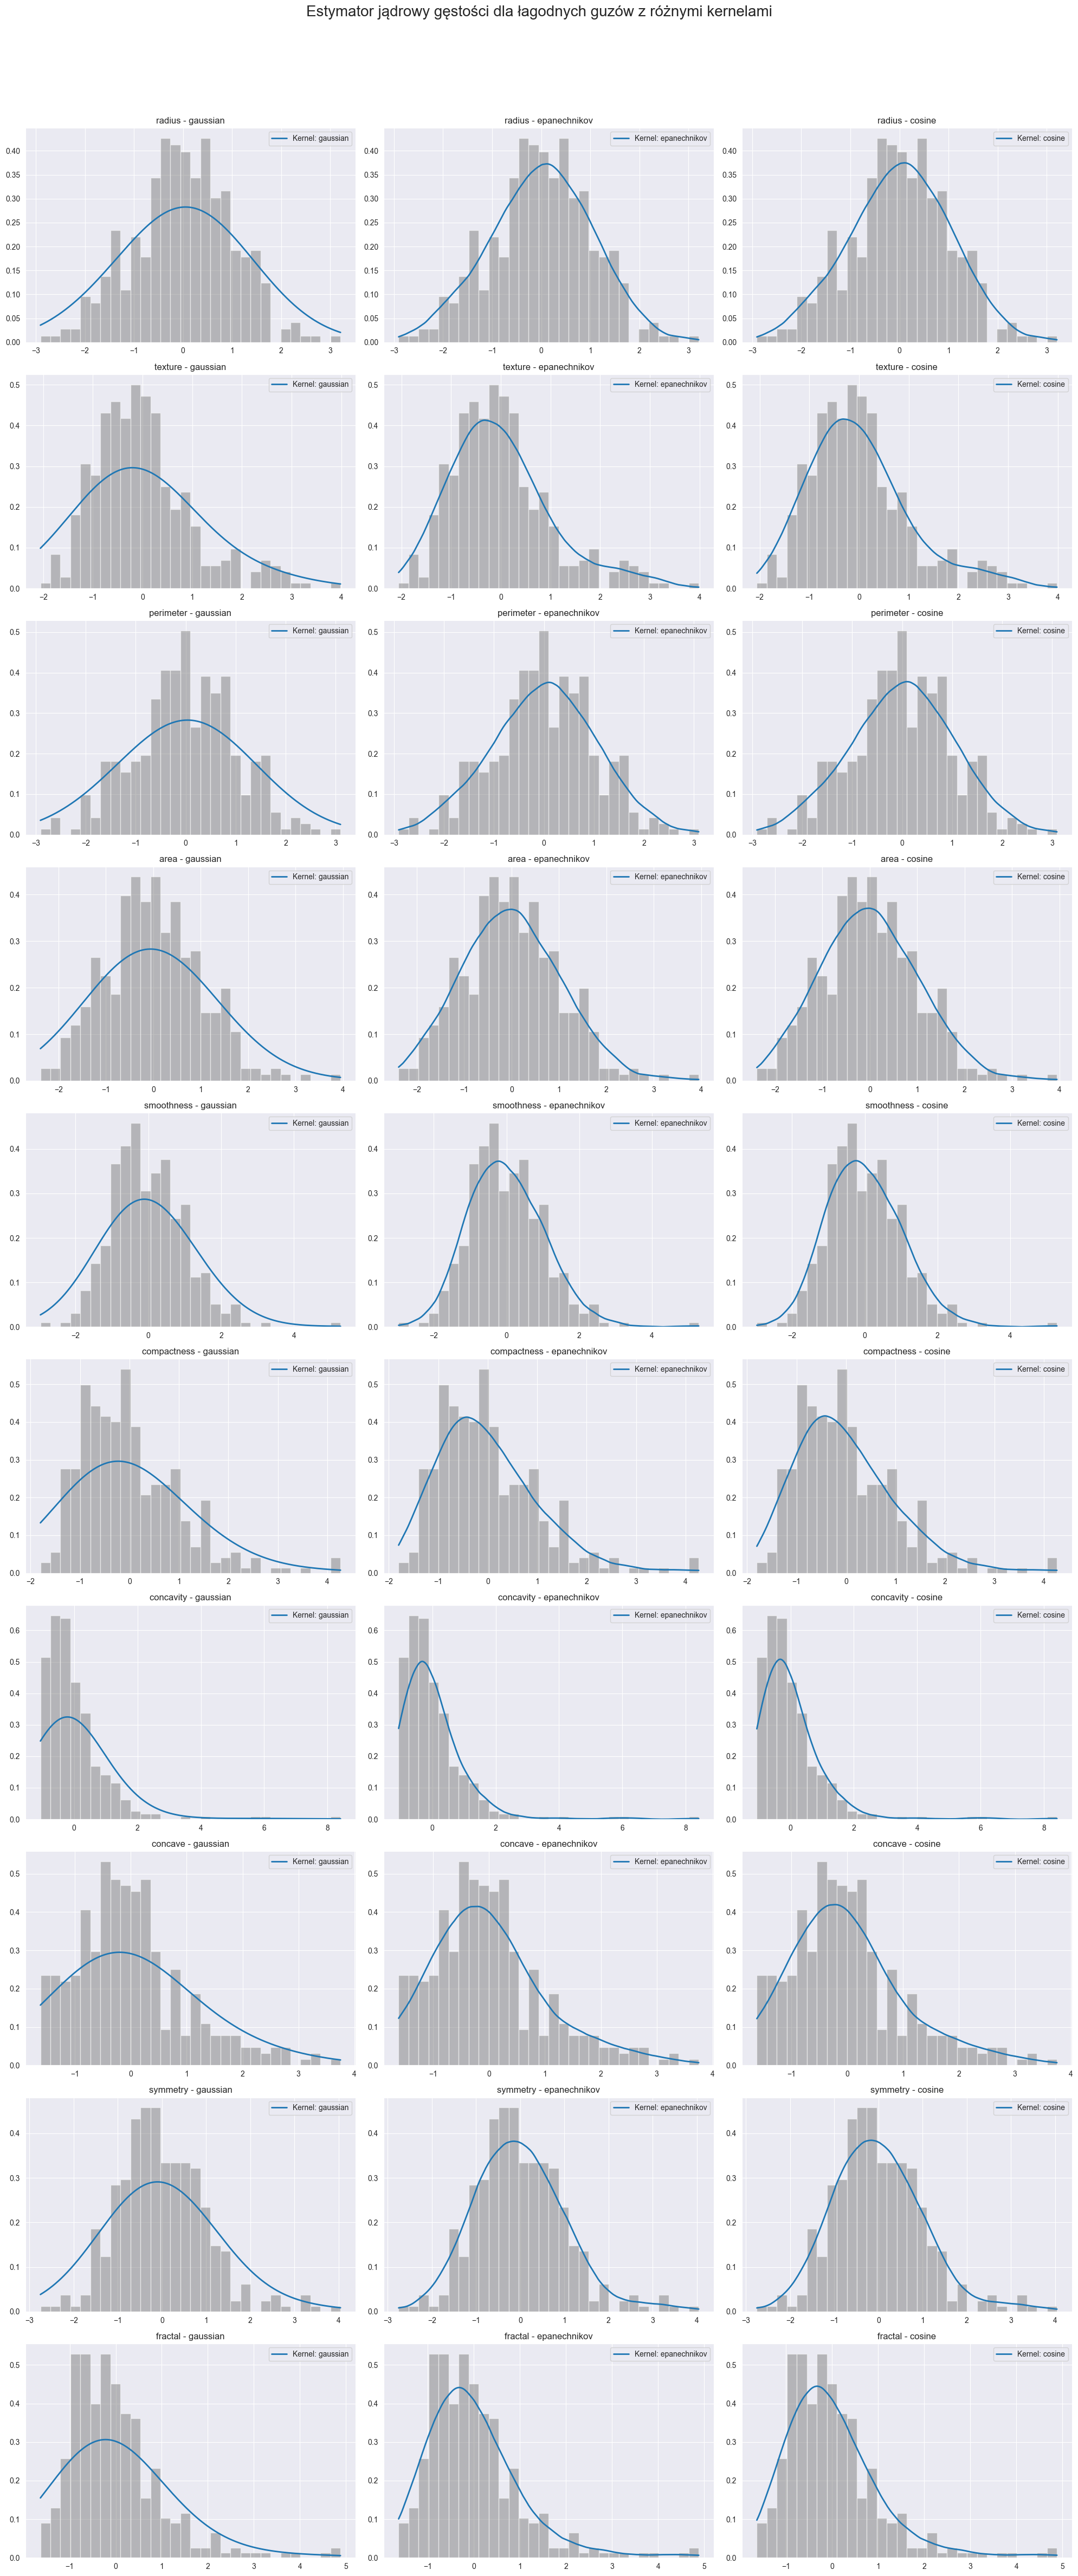

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import StandardScaler

import numpy as np

kernels = ['gaussian', 'epanechnikov', 'cosine']

def plot_kde_grid(data, kernels, nrows, ncols):
    features = data.columns
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(data.dropna())

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 50))
    fig.suptitle('Estymator jądrowy gęstości dla łagodnych guzów z różnymi kernelami', fontsize=20)

    for i, feature in enumerate(features):
        combined_data = standardized_data[:, i]
        x_vals = np.linspace(combined_data.min(), combined_data.max(), 1000).reshape(-1, 1)
        for j, kernel in enumerate(kernels):
            kde = KernelDensity(kernel=kernel).fit(combined_data.reshape(-1, 1))
            log_dens = kde.score_samples(x_vals)
            y_vals = np.exp(log_dens)
            axes[i, j].hist(combined_data, bins=30, density=True, alpha=0.5, color='gray')
            axes[i, j].plot(x_vals, y_vals, label=f'Kernel: {kernel}', linewidth=2)
            axes[i, j].set_title(f'{feature} - {kernel}')
            axes[i, j].set_xlabel('')
            axes[i, j].set_ylabel('')
            axes[i, j].legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

nrows = len(df_benign.columns)
ncols = len(kernels)

plot_kde_grid(df_benign, kernels, nrows=nrows, ncols=ncols)

Estymator jądrowy gęstości (KDE): Metoda ta pozwala na płynniejszą wizualizację rozkładu danych w porównaniu do histogramów.
Histogramy: Przedstawiają rzeczywisty rozkład danych, a ich gęstość sumuje się do 1, co ułatwia porównanie z estymacjami KDE.
### Różne kernele:
* Gaussian: Zapewnia najgładszą estymację, minimalizując szumy.
* Epanechnikov: Mniej gładki, bardziej szorstki estymator.
* Cosine: Wrażliwy na zmiany w danych, estymacje mogą być mniej gładkie.
### Porównanie KDE z histogramami:
Histogramy pokazują rzeczywisty rozkład, KDE wygładza dane, ujawniając ogólne wzorce.
Różne kernele wpływają na wynik estymacji, Gaussian jest najgładszy.